# Problem Statement 
The problem is preety much stright forward, we all are famelier with Garbage and waste material which is very harmful for our society.if we talk about amount of waste then the world almost generates at least 5 million tons of waste per day and this number is still increasing day by day that's why we need to aware about waste. This model which help us to classify waste with 7 different waste materials and it will show you the details of that particular waste materials. This will help to raise awareness for people to reduce and recycle waste.
## Overview
- There are <b>'cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash'</b> total 7 different types of waste materials which are use for recycling.
- Here i have 2187 images belonging 7 classes.
- Here i have trained dataset using VGG16,RESNET50 model via using Transfer Learning technique of CNN for classification.
- Here i have trained this model till 5 epochs and i got 69.77% accuracy. Since my computer can not aford more epochs at this time due unavailbility of GPU. if you have good ammount of gpu you can train more than 50 epochs.

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import cv2
import sklearn 
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [122]:
cd/Users/IRON MAN/Waste or Garbage Classification Using Deep Learning/Datasets/train

C:\Users\IRON MAN\Waste or Garbage Classification Using Deep Learning\Datasets\train


In [110]:
curr_path = os.getcwd()
curr_path

'C:\\Users\\IRON MAN\\Waste or Garbage Classification Using Deep Learning\\Datasets\\train'

In [111]:
# Show the data classes
classes = os.listdir(curr_path)
classes

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Datasets Understanding

(2187, 224, 224, 3) (2187,)


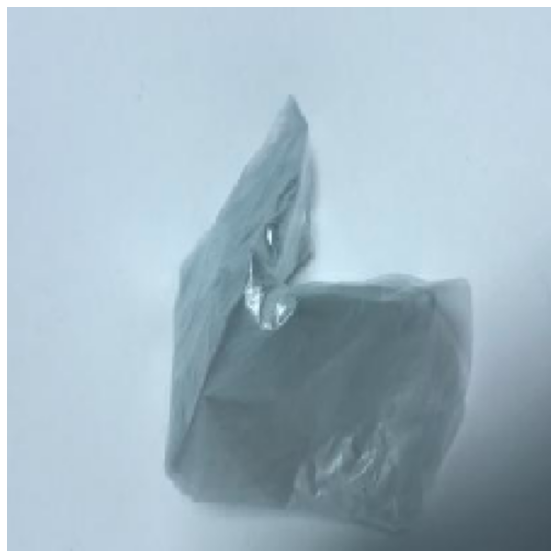

In [112]:
#Loading train datasets
train_data = []
train_labels = []
classes = 7 #data belonges to 7 class
for i in os.listdir(curr_path):
    dir = curr_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        train_data.append(img)
        train_labels.append(i)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print(train_data.shape, train_labels.shape)


In [113]:
cd/Users/IRON MAN/Waste or Garbage Classification Using Deep Learning/Datasets/test

C:\Users\IRON MAN\Waste or Garbage Classification Using Deep Learning\Datasets\test


In [117]:
curr_path = os.getcwd()
curr_path

'C:\\Users\\IRON MAN\\Waste or Garbage Classification Using Deep Learning\\Datasets\\test'

In [118]:
# Show the data classes
classes = os.listdir(curr_path)
classes

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [99]:
curr_test_path

'C:\\Users\\IRON MAN\\Waste or Garbage Classification Using Deep Learning\\Datasets\\test'

In [119]:
#Loading train datasets
test_data = []
test_labels = []
classes = 7 #data belonges to 7 class
for i in os.listdir(curr_path):
    dir = curr_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        test_data.append(img)
        test_labels.append(i)


test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(test_data.shape, test_labels.shape)


(564, 224, 224, 3) (564,)


In [124]:
cd/Users/IRON MAN/Waste or Garbage Classification Using Deep Learning/Datasets/train

C:\Users\IRON MAN\Waste or Garbage Classification Using Deep Learning\Datasets\train


In [125]:
curr_path = os.getcwd()

# Data Augmentation part done on training Dataset

In [126]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(curr_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 2187 images belonging to 7 classes.


In [130]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Data Augmentation Visualization

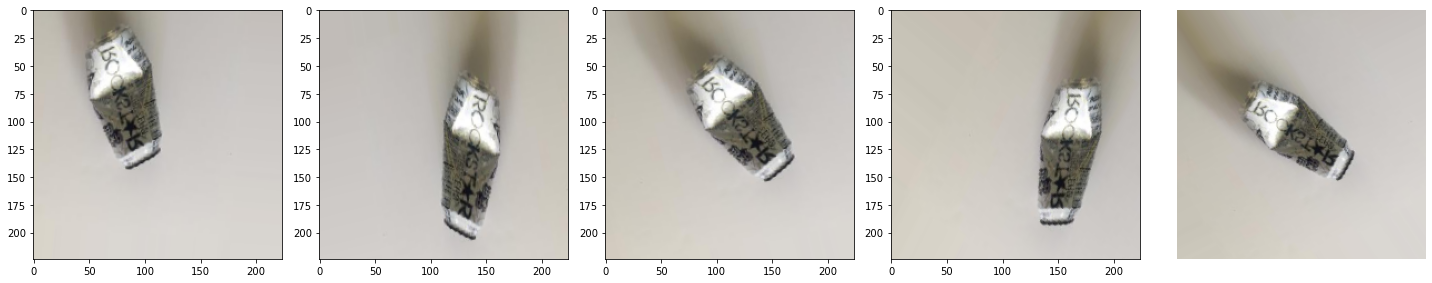

In [131]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Traingn images')

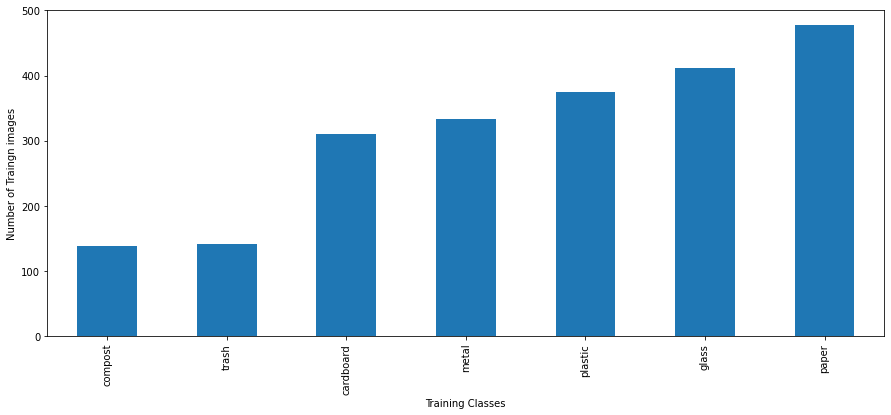

In [127]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(curr_path):
    data_dic[folder] = len(os.listdir(curr_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

In [132]:
cd/Users/IRON MAN/Waste or Garbage Classification Using Deep Learning/Datasets/test

C:\Users\IRON MAN\Waste or Garbage Classification Using Deep Learning\Datasets\test


In [133]:
curr_path = os.getcwd()

In [134]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
testing_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
testing_data = testing_datagen.flow_from_directory(curr_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 564 images belonging to 7 classes.


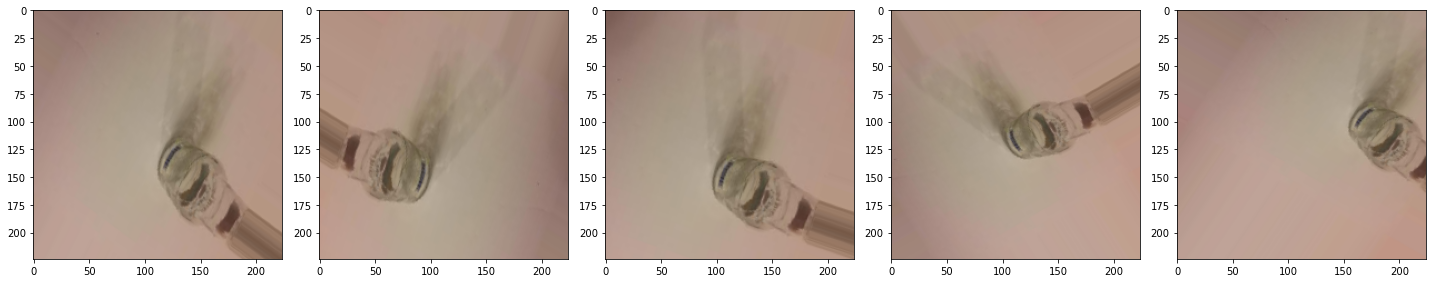

In [138]:
# showing augmented images
images = [testing_data[1][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Valedation images')

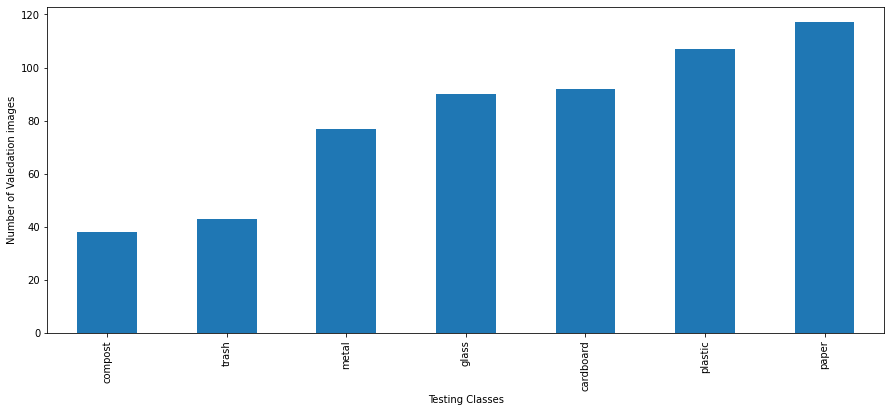

In [140]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(curr_path):
    data_dic[folder] = len(os.listdir(curr_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Testing Classes')
plt.ylabel('Number of Valedation images')

# CNN - VGG16 Architeture using Tranfer Learning

In [143]:
IMAGE_SIZE = [224,224]

In [144]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [145]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [162]:
cd/Users/IRON MAN/Waste or Garbage Classification Using Deep Learning

C:\Users\IRON MAN\Waste or Garbage Classification Using Deep Learning


In [163]:
curr_path = os.getcwd()

In [164]:
  # useful for getting number of classes
folders = glob(curr_path + '/'+'Datasets/train/*')

In [166]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [167]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
!pip install visualkeras
import visualkeras

In [ ]:
visualkeras.layered_view(model)

In [189]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(lr=1e-5),
  metrics=['accuracy']
)

In [182]:
# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath = 'vgg16_model.weights.best.hdf5', 
                               verbose = False, 
                               save_best_only = True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4,
                           restore_best_weights = True,
                           mode = 'min')

In [190]:
import tensorflow as tf
result = model.fit_generator(training_data,steps_per_epoch=len(training_data),epochs=5,callbacks=[early_stop, checkpointer],validation_data=testing_data,validation_steps=len(testing_data))

Epoch 1/5
69/69 [==============================] - 1281s 19s/step - loss: 2.2331 - accuracy: 0.2371 - val_loss: 1.8395 - val_accuracy: 0.2961
Epoch 2/5
69/69 [==============================] - 1307s 19s/step - loss: 1.7691 - accuracy: 0.3170 - val_loss: 1.6962 - val_accuracy: 0.3440
Epoch 3/5
69/69 [==============================] - 1309s 19s/step - loss: 1.6605 - accuracy: 0.3392 - val_loss: 1.6338 - val_accuracy: 0.3493
Epoch 4/5
69/69 [==============================] - 1339s 19s/step - loss: 1.5888 - accuracy: 0.3723 - val_loss: 1.5463 - val_accuracy: 0.4113
Epoch 5/5
69/69 [==============================] - 1495s 22s/step - loss: 1.5345 - accuracy: 0.4130 - val_loss: 1.5207 - val_accuracy: 0.4202


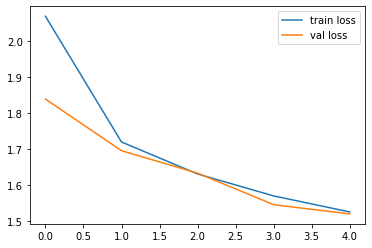

<Figure size 432x288 with 0 Axes>

In [191]:
# loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

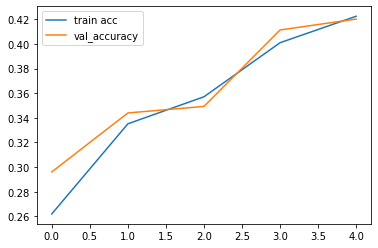

<Figure size 432x288 with 0 Axes>

In [194]:
# accuracies
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Evaluation Matrix

In [195]:
# Score
score = model.evaluate(testing_data, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 1.5098899602890015
Test accuracy 0.4308510720729828


In [196]:
y_pred = model.predict(testing_data)

In [197]:
y_pred

array([[0.05246322, 0.0035954 , 0.07212622, ..., 0.56470567, 0.0585991 ,
        0.01326605],
       [0.0637768 , 0.03431052, 0.16232632, ..., 0.2600443 , 0.2530538 ,
        0.07194242],
       [0.03992847, 0.13571069, 0.23788604, ..., 0.11688869, 0.21037768,
        0.06585112],
       ...,
       [0.08755374, 0.04535502, 0.23227586, ..., 0.24077322, 0.1356124 ,
        0.10772082],
       [0.02469265, 0.05921967, 0.20631665, ..., 0.12519558, 0.26371318,
        0.13957007],
       [0.09868867, 0.02280128, 0.17792337, ..., 0.24994104, 0.24707946,
        0.094432  ]], dtype=float32)